### Necessary Setup Before Starting The Analysis

In [254]:
#Clear the memory of all variables and saved data
%reset -f 

In [255]:
#Necessary Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings("ignore") #Ignore warnings
plt.style.use('seaborn-dark') #Set the style of the graphical plots
 
#Importation and Variable Assignment of 2016 Cancer Multi-Dataset
excelCancerDataFile2016 = r"Current Relevant Available Cancer Data for 2016 England.xls"

diagnosed_of_cancer_in_2016 =  pd.read_excel(excelCancerDataFile2016, sheet_name= "Diagnosed cancer")
death_from_cancer_in_2016 =  pd.read_excel(excelCancerDataFile2016, "Death from cancer")
diagnosed_of_cancer_from_different_regions_in_2016 =  pd.read_excel(excelCancerDataFile2016, sheet_name= "Diagnosed cancer by region")
diagnosed_of_cancer_from_1995_to_2016 =  pd.read_excel(excelCancerDataFile2016, sheet_name= "Diagnosed cancer from 1995-2016")
death_from_cancer_from_2001_to_2016 =  pd.read_excel(excelCancerDataFile2016, sheet_name= "Death from cancer 2001-2016")


#Importation and Variable Assignment of 2017 Cancer Multi-Dataset
excelCancerDataFile2017 = r"Current Relevant Available Cancer Data for 2017 England.xls"

diagnosed_of_cancer_in_2017 =  pd.read_excel(excelCancerDataFile2017, sheet_name= "Diagnosed cancer")
diagnosed_of_cancer_from_different_regions_in_2017 =  pd.read_excel(excelCancerDataFile2017, sheet_name= "Diagnosed cancer by region")
diagnosed_of_cancer_from_1995_to_2017 =  pd.read_excel(excelCancerDataFile2017, sheet_name= "Number of diagnosis 1995-2017")


#Importation and Variable Assignment of 2020 Q1 Smoking Multi-Dataset
excelSmokingDataFile2020Q1 = r"Current Relevant Available Smoking Data for England.xls"
smoking_in_each_country_of_the_uk = pd.read_excel(excelSmokingDataFile2020Q1, sheet_name= "Smoking by country, age, & sex")
smoking_in_each_region_of_england = pd.read_excel(excelSmokingDataFile2020Q1, sheet_name= "Smoking by region, age, & sex")
smoking_by_economic_activity_in_each_country_of_the_uk = pd.read_excel(excelSmokingDataFile2020Q1, sheet_name= "Smoking by economic activity")
smoking_by_educational_level_in_each_country_of_the_uk = pd.read_excel(excelSmokingDataFile2020Q1, sheet_name= "Smoking by educational level")
smoking_by_ethnicity_in_each_country_of_the_uk = pd.read_excel(excelSmokingDataFile2020Q1, sheet_name= "Smoking by ethnicity")
self_reported_health_status_of_persons_in_each_country_of_the_uk = pd.read_excel(excelSmokingDataFile2020Q1, sheet_name= "Self reported health status")
proportion_of_cigarette_smokers_in_each_country_of_the_uk = pd.read_excel(excelSmokingDataFile2020Q1, sheet_name= "Proportion of cigarette smokers")



#

### Classes and Functions Created And Applied During This Project

In [256]:


class GetSpecificColumnsFromDataset:
    
    def __init__(self, data, search_query = None):
        self.data = data
        self.search_query = search_query if search_query is not None else search_query
        
    def getSpecificColumns(self, *return_columns):
        list_of_columns_to_search_through = self.data.columns
        essential_columns = []
        year_columns = []
        
        for column in list_of_columns_to_search_through:
            
            if isinstance(column, int):
                year_columns.append(column)
            
            else:
                try:
                    int(column[0:3])
                    year_columns.append(column)
                    
                except:
                    try:
                        if return_columns[0] == "age":
                            int(column[0])
                            year_columns.append(column)
                            
                    except:
                        pass
                    
                try:
                    return_columns[0] != "age"
                    int(column[0:3])
                    
                except:
                    essential_columns.append(column)
                    
        if return_columns == ("not_year", "year"):
            return essential_columns, year_columns
        
        if return_columns[0] == "not_year" or return_columns[0] == "not_age":
            return essential_columns
            
        if return_columns[0] == "year" or return_columns[0] == "age":
            return year_columns
        
        else:
            print("Cannot determine which columns you want to return")
        
    def searchColumnsInDataSetForASpecificMatch(self, getSpecificColumns):
        list_of_columns_to_search_through = self.data.columns
        
        essential_columns = getSpecificColumns
        
        new_colums_generated_after_search_query = list(essential_columns)
        
        for word in list_of_columns_to_search_through:
            if self.search_query in word:
                new_colums_generated_after_search_query.append(word)
                
        return(new_colums_generated_after_search_query)

    def createSumOfAllTheYears(self, start_column,start_index= 0, stop_index= None):
        if stop_index == None:
            stop_index = len(self.data)

        essential_columns, columns_of_years = self.getSpecificColumns("not_year", "year")
        new_column_created_from_index_query = pd.DataFrame()
        list_of_summed_values_from_index_query = [] 
        
        for index, index_values in enumerate(self.data[start_index:stop_index].iloc[:,start_column:].index.values):
            summed_values_from_index = sum(self.data[start_index:stop_index].iloc[index,start_column:].values)
            list_of_summed_values_from_index_query.append(summed_values_from_index)
        
        new_column_created_from_index_query["For All Years"] = new_column_created_from_index_query.append(list_of_summed_values_from_index_query)
        dataframe_of_year_columns = self.data[columns_of_years][start_index:stop_index].reset_index(drop=True)
        dataframe_used_in_creating_final_output = self.data[essential_columns][start_index:stop_index].reset_index(drop=True)
        dataframe_with_summed_year_column_inluded = dataframe_used_in_creating_final_output.join([new_column_created_from_index_query, dataframe_of_year_columns])
        
        return dataframe_with_summed_year_column_inluded

 #

### Analyzing 2016 Cancer Multi-Dataset


In [257]:
count_of_men_and_women_diagnosed_of_cancer_in_2016_england = diagnosed_of_cancer_in_2016.iloc[-2:,:]
count_of_men_and_women_diagnosed_of_cancer_in_2016_england

,Site_description,Sex,All_ages,Under_1,1_to_4,5_to_9,10_to_14,15_to_19,20_to_24,25_to_29,...,45_to_49,50_to_54,55_to_59,60_to_64,65_to_69,70_to_74,75_to_79,80_to_84,85_to_89,90_and_over
227,All malignant cancer registrations,Males,228569,83,262,204,218,332,591,1028,...,5976,10282,15566,21480,35125,37895,36207,29807,18361,8392
228,All malignant cancer registrations,Females,204962,70,246,187,195,343,658,1624,...,10408,14067,16110,18820,26680,26591,25529,23068,17071,10980


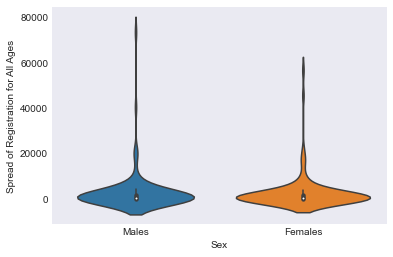

In [258]:
graphical_count_of_men_and_women_diagnosed_of_cancer_in_2016_england = sns.violinplot(data = diagnosed_of_cancer_in_2016[2:-4], x= "Sex", y= "All_ages")
graphical_count_of_men_and_women_diagnosed_of_cancer_in_2016_england.set_ylabel("Spread of Registration for All Ages");

In [259]:
count_of_men_and_women_diagnosed_of_brain_cancer_in_2016_england = diagnosed_of_cancer_in_2016[diagnosed_of_cancer_in_2016.Site_description == "Malignant neoplasm of brain"]
count_of_men_and_women_diagnosed_of_brain_cancer_in_2016_england

,Site_description,Sex,All_ages,Under_1,1_to_4,5_to_9,10_to_14,15_to_19,20_to_24,25_to_29,...,45_to_49,50_to_54,55_to_59,60_to_64,65_to_69,70_to_74,75_to_79,80_to_84,85_to_89,90_and_over
126,Malignant neoplasm of brain,Males,2583,9,47,43,38,24,36,61,...,142,185,246,281,347,291,237,195,89,39
127,Malignant neoplasm of brain,Females,1933,12,38,58,34,29,29,50,...,113,129,154,170,215,245,154,157,102,58


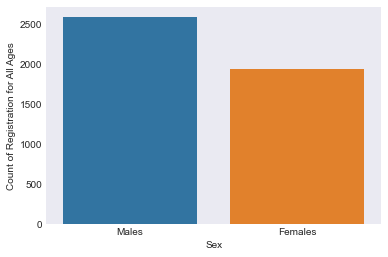

In [260]:
graphical_count_of_men_and_women_diagnosed_of_brain_cancer_in_2016_england = sns.barplot(data = diagnosed_of_cancer_in_2016[diagnosed_of_cancer_in_2016.Site_description == "Malignant neoplasm of brain"], x= "Sex", y= "All_ages")
graphical_count_of_men_and_women_diagnosed_of_brain_cancer_in_2016_england.set_ylabel("Count of Registration for All Ages");

#

In [261]:
count_of_men_and_women_who_died_of_cancer_in_2016_england = death_from_cancer_in_2016.iloc[-2:,:]
count_of_men_and_women_who_died_of_cancer_in_2016_england 


,Site_description,Sex,All_ages,Under_1,1_to_4,5_to_9,10_to_14,15_to_19,20_to_24,25_to_29,...,45_to_49,50_to_54,55_to_59,60_to_64,65_to_69,70_to_74,75_to_79,80_to_84,85_to_89,90_and_over
227,All malignant cancer registrations,Males,72829,1,31,34,36,55,86,109,...,1128,2189,3569,5583,9282,10753,12001,11960,9349,5669
228,All malignant cancer registrations,Females,64076,3,23,19,29,43,52,132,...,1392,2407,3483,4573,7328,8479,9566,9807,8670,6662


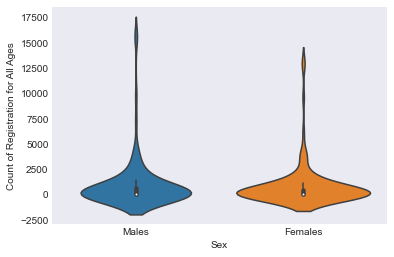

In [262]:
graphical_count_of_men_and_women_who_died_of_cancer_in_2016_england= sns.violinplot(data = death_from_cancer_in_2016[2:-4], x= "Sex", y= "All_ages")
graphical_count_of_men_and_women_who_died_of_cancer_in_2016_england.set_ylabel("Count of Registration for All Ages");

In [263]:
count_of_men_and_women_who_died_of_brain_cancer_in_2016_england = death_from_cancer_in_2016[death_from_cancer_in_2016.Site_description == "Malignant neoplasm of brain"]
count_of_men_and_women_who_died_of_brain_cancer_in_2016_england

,Site_description,Sex,All_ages,Under_1,1_to_4,5_to_9,10_to_14,15_to_19,20_to_24,25_to_29,...,45_to_49,50_to_54,55_to_59,60_to_64,65_to_69,70_to_74,75_to_79,80_to_84,85_to_89,90_and_over
126,Malignant neoplasm of brain,Males,2086,0,13,13,12,7,16,16,...,112,158,203,247,335,278,227,199,88,38
127,Malignant neoplasm of brain,Females,1528,0,5,6,8,14,10,15,...,75,101,119,164,185,211,200,156,91,56


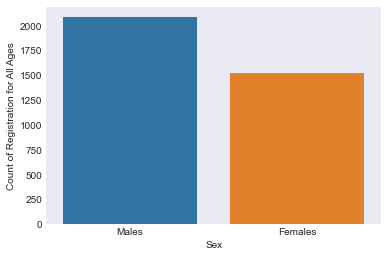

In [264]:
graphical_count_of_men_and_women_who_died_of_brain_cancer_in_2016_england = sns.barplot(data = death_from_cancer_in_2016[death_from_cancer_in_2016.Site_description == "Malignant neoplasm of brain"], x= "Sex", y="All_ages")
graphical_count_of_men_and_women_who_died_of_brain_cancer_in_2016_england.set_ylabel("Count of Registration for All Ages");

#

In [265]:
count_of_men_and_women_from_different_regions_who_were_diagnosed_of_cancer_in_2016_england = diagnosed_of_cancer_from_different_regions_in_2016.iloc[-2:,:]
count_of_men_and_women_from_different_regions_who_were_diagnosed_of_cancer_in_2016_england

,Site_description,Sex,England,North_\nEast_E12000001,North_\nWest_E12000002,Yorkshire_\nand_The_\nHumber_E12000003,East_Midlands_E12000004,West_Midlands_E12000005,East_E12000006,London_E12000007,South_\nEast_E12000008,South_\nWest_E12000009
227,All malignant cancer registrations,Males,228569,11509,30288,21965,19773,23656,27737,23097,42528,28016
228,All malignant cancer registrations,Females,204962,10534,28160,19958,17537,20597,24131,21647,37279,25119


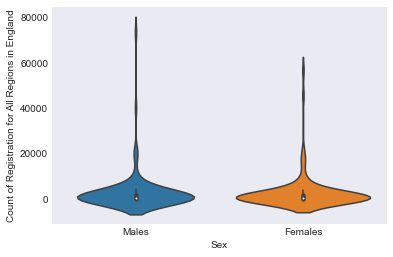

In [266]:
graphical_count_of_men_and_women_from_different_regions_who_were_diagnosed_of_cancer_in_2016_england = sns.violinplot(data = diagnosed_of_cancer_from_different_regions_in_2016[2:-4], x= "Sex", y= "England")
graphical_count_of_men_and_women_from_different_regions_who_were_diagnosed_of_cancer_in_2016_england.set_ylabel("Count of Registration for All Regions in England");

In [267]:
count_of_men_and_women_from_different_regions_who_were_diagnosed_of_brain_cancer_in_2016_england = diagnosed_of_cancer_from_different_regions_in_2016[diagnosed_of_cancer_from_different_regions_in_2016.Site_description == "Malignant neoplasm of brain"]
count_of_men_and_women_from_different_regions_who_were_diagnosed_of_brain_cancer_in_2016_england

,Site_description,Sex,England,North_\nEast_E12000001,North_\nWest_E12000002,Yorkshire_\nand_The_\nHumber_E12000003,East_Midlands_E12000004,West_Midlands_E12000005,East_E12000006,London_E12000007,South_\nEast_E12000008,South_\nWest_E12000009
126,Malignant neoplasm of brain,Males,2583,137,360,248,235,305,285,273,422,318
127,Malignant neoplasm of brain,Females,1933,114,266,208,160,199,229,205,320,232


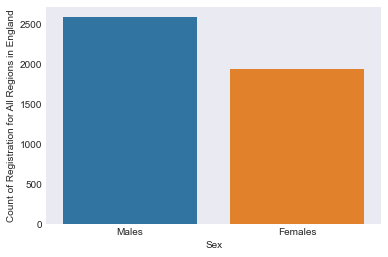

In [268]:
graphical_count_of_men_and_women_from_different_regions_who_were_diagnosed_of_brain_cancer_in_2016_england = sns.barplot(data = diagnosed_of_cancer_from_different_regions_in_2016[diagnosed_of_cancer_from_different_regions_in_2016.Site_description == "Malignant neoplasm of brain"], x= "Sex", y= "England")
graphical_count_of_men_and_women_from_different_regions_who_were_diagnosed_of_brain_cancer_in_2016_england.set_ylabel("Count of Registration for All Regions in England");

#

In [269]:
count_of_men_and_women_diagnosed_of_cancer_from_1995_to_2016_england = diagnosed_of_cancer_from_1995_to_2016.iloc[-2:,:]
count_of_men_and_women_diagnosed_of_cancer_from_1995_to_2016_england

,Site_description,Sex,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
185,All malignant cancer registrations,Males,125855,126246,131641,135240,139045,142200,145903,146232,...,170575,184989,188423,194470,199486,208221,217967,220562,225929,228569
186,All malignant cancer registrations,Females,124240,125345,131705,134452,139167,139013,141209,140359,...,160634,172330,173013,177929,183328,189243,196391,200245,203155,204962


In [270]:
count_of_men_and_women_diagnosed_of_brain_cancer_from_1995_to_2016_england = diagnosed_of_cancer_from_1995_to_2016[diagnosed_of_cancer_from_1995_to_2016.Site_description == "Malignant neoplasm of brain"]
count_of_men_and_women_diagnosed_of_brain_cancer_from_1995_to_2016_england

,Site_description,Sex,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
128,Malignant neoplasm of brain,Males,1914,1905,2099,1980,2079,2146,2105,2125,...,2238,2341,2394,2360,2346,2461,2582,2449,2628,2583
129,Malignant neoplasm of brain,Females,1497,1493,1514,1563,1472,1636,1541,1573,...,1672,1739,1755,1747,1816,1714,1859,1839,1928,1933


#

In [271]:
count_of_men_and_women_who_died_of_cancer_from_2001_to_2016_england = death_from_cancer_from_2001_to_2016.iloc[-2:,:]
count_of_men_and_women_who_died_of_cancer_from_2001_to_2016_england

,Site_description,Sex,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
185,All malignant cancer registrations,Males,66103,66764,66297,65956,65786,66417,66545,67325,67808,68218,68929,70403,70471,71450,72181,72829
186,All malignant cancer registrations,Females,61310,61659,61041,60128,60489,60404,61214,61516,60765,61331,62117,62728,62414,62911,63122,64076


In [272]:
count_of_men_and_women_who_died_of_brain_cancer_from_1995_to_2016_england = death_from_cancer_from_2001_to_2016[death_from_cancer_from_2001_to_2016.Site_description == "Malignant neoplasm of brain"]
count_of_men_and_women_who_died_of_brain_cancer_from_1995_to_2016_england

,Site_description,Sex,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
128,Malignant neoplasm of brain,Males,1624,1566,1614,1692,1662,1715,1696,1773,1814,1850,1834,1990,1928,2036,2012,2086
129,Malignant neoplasm of brain,Females,1166,1156,1164,1127,1118,1210,1273,1239,1324,1350,1401,1442,1423,1420,1444,1528


 #

### Analyzing 2017 Cancer Multi-Dataset


In [273]:
count_of_men_and_women_diagnosed_of_cancer_in_2017_england = diagnosed_of_cancer_in_2017.iloc[-2:,:]
count_of_men_and_women_diagnosed_of_cancer_in_2017_england

,Site_description,Sex,All_ages,Under_1,1_to_4,5_to_9,10_to_14,15_to_19,20_to_24,25_to_29,...,45_to_49,50_to_54,55_to_59,60_to_64,65_to_69,70_to_74,75_to_79,80_to_84,85_to_89,90_and_over
1293,All malignant cancer registrations,Males,227919,83,307,199,198,329,570,1020,...,5754,10242,15518,21829,32696,39877,35632,29764,18726,8560
1294,All malignant cancer registrations,Females,204081,75,250,171,188,305,602,1513,...,10058,14132,16188,18718,25055,28182,25400,23130,17321,10743


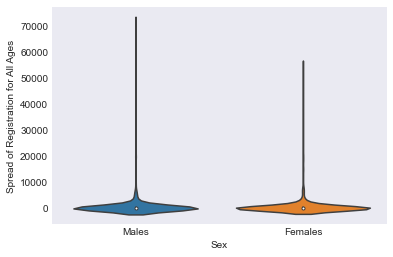

In [274]:
graphical_count_of_men_and_women_diagnosed_of_cancer_in_2017_england = sns.violinplot(data = diagnosed_of_cancer_in_2017[2:-4], x= "Sex", y= "All_ages")
graphical_count_of_men_and_women_diagnosed_of_cancer_in_2017_england.set_ylabel("Spread of Registration for All Ages");

In [275]:
count_of_men_and_women_diagnosed_of_brain_cancer_in_2017_england = diagnosed_of_cancer_in_2017[diagnosed_of_cancer_in_2017.Site_description == "Malignant neoplasm of brain"]
count_of_men_and_women_diagnosed_of_brain_cancer_in_2017_england

,Site_description,Sex,All_ages,Under_1,1_to_4,5_to_9,10_to_14,15_to_19,20_to_24,25_to_29,...,45_to_49,50_to_54,55_to_59,60_to_64,65_to_69,70_to_74,75_to_79,80_to_84,85_to_89,90_and_over
671,Malignant neoplasm of brain,Males,2654,13,46,48,29,29,42,68,...,133,200,257,248,354,334,255,185,89,42
672,Malignant neoplasm of brain,Females,1914,6,45,39,34,24,30,54,...,92,121,162,157,242,236,196,140,95,56


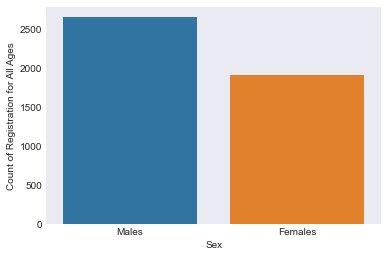

In [276]:
graphical_count_of_men_and_women_diagnosed_of_brain_cancer_in_2017_england = sns.barplot(data = diagnosed_of_cancer_in_2017[diagnosed_of_cancer_in_2017.Site_description == "Malignant neoplasm of brain"], x= "Sex", y= "All_ages")
graphical_count_of_men_and_women_diagnosed_of_brain_cancer_in_2017_england.set_ylabel("Count of Registration for All Ages");

#

In [277]:
count_of_men_and_women_from_different_regions_who_were_diagnosed_of_cancer_in_2017_england = diagnosed_of_cancer_from_different_regions_in_2017.iloc[-2:,:]
count_of_men_and_women_from_different_regions_who_were_diagnosed_of_cancer_in_2017_england

,Site_description,Sex,All_Regions,North East_E12000001,North West_E12000002,Yorkshire and The Humber_E12000003,East Midlands_E12000004,West Midlands_E12000005,East_E12000006,London_E12000007,South East_E12000008,South West_E12000009
227,All malignant cancer registrations,Males,227919,11644,30447,22215,19885,23547,27498,22797,42010,27876
228,All malignant cancer registrations,Females,204081,10769,28195,20024,17320,20800,23843,21736,36717,24677


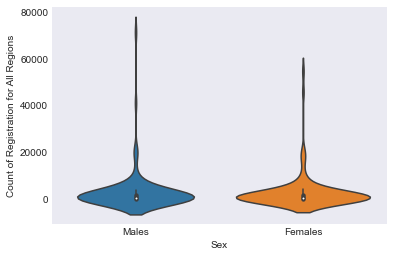

In [278]:
graphical_count_of_men_and_women_from_different_regions_who_were_diagnosed_of_cancer_in_2017_england = sns.violinplot(data = diagnosed_of_cancer_from_different_regions_in_2017[2:-4], x= "Sex", y= "All_Regions")
graphical_count_of_men_and_women_from_different_regions_who_were_diagnosed_of_cancer_in_2017_england.set_ylabel("Count of Registration for All Regions");

In [279]:
count_of_men_and_women_from_different_regions_who_were_diagnosed_of_brain_cancer_in_2017_england = diagnosed_of_cancer_from_different_regions_in_2017[diagnosed_of_cancer_from_different_regions_in_2017.Site_description == "Malignant neoplasm of brain"]
count_of_men_and_women_from_different_regions_who_were_diagnosed_of_brain_cancer_in_2017_england

,Site_description,Sex,All_Regions,North East_E12000001,North West_E12000002,Yorkshire and The Humber_E12000003,East Midlands_E12000004,West Midlands_E12000005,East_E12000006,London_E12000007,South East_E12000008,South West_E12000009
126,Malignant neoplasm of brain,Males,2654,138,358,264,224,254,320,303,472,321
127,Malignant neoplasm of brain,Females,1914,93,265,168,184,204,231,195,336,238


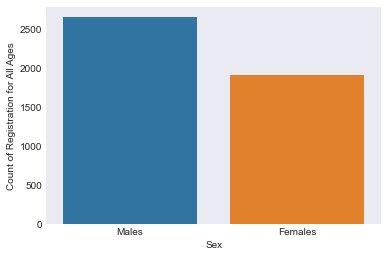

In [280]:
graphical_count_of_men_and_women_from_different_regions_who_were_diagnosed_of_brain_cancer_in_2017_england = sns.barplot(data = diagnosed_of_cancer_from_different_regions_in_2017[diagnosed_of_cancer_from_different_regions_in_2017.Site_description == "Malignant neoplasm of brain"], x= "Sex", y= "All_Regions")
graphical_count_of_men_and_women_from_different_regions_who_were_diagnosed_of_brain_cancer_in_2017_england.set_ylabel("Count of Registration for All Ages");

#

In [281]:
count_of_people_diagnosed_of_cancer_from_1995_to_2017_england = GetSpecificColumnsFromDataset(diagnosed_of_cancer_from_1995_to_2017)
count_of_people_diagnosed_of_cancer_from_1995_to_2017_england = count_of_people_diagnosed_of_cancer_from_1995_to_2017_england.createSumOfAllTheYears(start_column= 1).iloc[[1],:]
count_of_people_diagnosed_of_cancer_from_1995_to_2017_england

,Site_description,For All Years,1995,1996,1997,1998,1999,2000,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,All malignant cancer registrations,7737745,250095,251591,263346,269692,278212,281213,287112,286591,...,357319,361436,372399,382814,397464,415535,422797,430713,438438,432000


In [282]:
total_count_of_people_diagnosed_of_cancer_from_1995_to_2017_england = GetSpecificColumnsFromDataset(diagnosed_of_cancer_from_1995_to_2017)
total_count_of_people_diagnosed_of_cancer_from_1995_to_2017_england = total_count_of_people_diagnosed_of_cancer_from_1995_to_2017_england.createSumOfAllTheYears(start_column= 1)
count_of_people_diagnosed_of_brain_cancer_from_1995_to_2017_england = total_count_of_people_diagnosed_of_cancer_from_1995_to_2017_england[total_count_of_people_diagnosed_of_cancer_from_1995_to_2017_england.Site_description == "Malignant neoplasm of brain"]
count_of_people_diagnosed_of_brain_cancer_from_1995_to_2017_england

,Site_description,For All Years,1995,1996,1997,1998,1999,2000,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
22,Malignant neoplasm of brain,143792,3411,3398,3613,3543,3551,3782,6436,6420,...,7092,7287,7307,7397,7607,7804,7764,8033,8226,8170


#

#

### Analyzing Q1 2020 Smoking Multi-DataSet


In [283]:
columnsOfSmokingInEachCountryFor2016 = GetSpecificColumnsFromDataset(smoking_in_each_country_of_the_uk,"2016")
columnsOfSmokingInEachCountryFor2016 = columnsOfSmokingInEachCountryFor2016.searchColumnsInDataSetForASpecificMatch(columnsOfSmokingInEachCountryFor2016.getSpecificColumns("not_year"))
smoking_in_each_country_of_the_uk[columnsOfSmokingInEachCountryFor2016].head(10)

,Sex,Country,Age_group,2016_Current_smokers_%,2016_LCI,2016_UCI,2016_Ex-smokers_%,2016_LCI.1,2016_UCI.1,2016_Never_smoked_%,2016_LCI.2,2016_UCI.2,2016_Weighted_count,2016_Sample_size
0,Persons,England,18-24,19.5,18.6,20.3,7.1,6.6,7.6,73.4,72.5,74.4,4438369,13415
1,Persons,England,25-34,20.6,19.9,21.3,16.6,16.0,17.1,62.9,62.1,63.7,6917561,22627
2,Persons,England,35-44,17.6,17.0,18.2,23.5,22.8,24.1,58.9,58.2,59.7,6538277,25479
3,Persons,England,45-54,16.8,16.3,17.4,24.9,24.3,25.5,58.3,57.6,59.0,7250171,28404
4,Persons,England,55-64,14.4,13.9,14.9,31.0,30.3,31.7,54.5,53.8,55.3,6014739,26440
5,Persons,England,65+,7.9,7.6,8.3,42.6,42.0,43.2,49.5,48.9,50.1,9125503,41193
6,Persons,England,All 18+,15.5,15.3,15.8,26.2,25.9,26.5,58.3,58.0,58.6,40284620,157558
7,Persons,Wales,18-24,20.0,17.6,22.4,6.2,4.8,7.6,73.8,71.1,76.6,279639,1880
8,Persons,Wales,25-34,22.9,20.9,24.8,16.3,14.5,18.0,60.9,58.5,63.2,365078,2907
9,Persons,Wales,35-44,19.2,17.6,20.8,22.1,20.4,23.7,58.8,56.8,60.7,341987,3233


In [284]:
columnsOfSmokingInEachCountryFor2017 = GetSpecificColumnsFromDataset(smoking_in_each_country_of_the_uk,"2017")
columnsOfSmokingInEachCountryFor2017 = columnsOfSmokingInEachCountryFor2017.searchColumnsInDataSetForASpecificMatch(columnsOfSmokingInEachCountryFor2017.getSpecificColumns("not_year"))
smoking_in_each_country_of_the_uk[columnsOfSmokingInEachCountryFor2017].head(7)


,Sex,Country,Age_group,2017_Current_smokers_%,2017_LCI,2017_UCI,2017_Ex-smokers_%,2017_LCI.1,2017_UCI.1,2017_Never_smoked_%,2017_LCI.2,2017_UCI.2,2017_Weighted_count,2017_Sample_size
0,Persons,England,18-24,18.1,17.2,18.9,7.2,6.6,7.7,74.8,73.8,75.7,4426839,13046
1,Persons,England,25-34,19.6,18.9,20.3,16.5,15.9,17.1,63.9,63.1,64.7,7064194,22503
2,Persons,England,35-44,16.5,15.9,17.0,23.9,23.3,24.6,59.6,58.9,60.4,6587433,25533
3,Persons,England,45-54,16.4,15.9,16.9,25.8,25.2,26.4,57.8,57.1,58.5,7315027,28486
4,Persons,England,55-64,14.4,13.9,15.0,30.2,29.6,30.9,55.3,54.6,56.1,6177174,27012
5,Persons,England,65+,7.8,7.5,8.1,41.5,40.9,42.1,50.7,50.1,51.3,9455591,42309
6,Persons,England,All 18+,14.9,14.6,15.1,26.2,25.9,26.4,59.0,58.6,59.3,41026256,158889


#

In [285]:
columnsOfSmokingInEachRegionFor2016 = GetSpecificColumnsFromDataset(smoking_in_each_region_of_england,"2016")
columnsOfSmokingInEachRegionFor2016 = columnsOfSmokingInEachRegionFor2016.searchColumnsInDataSetForASpecificMatch(columnsOfSmokingInEachRegionFor2016.getSpecificColumns("not_year"))
smoking_in_each_region_of_england[columnsOfSmokingInEachRegionFor2016].head()


,Sex,Region_code,Region_of_England,Age_group,2016_Current_smokers_%,2016_LCI,2016_UCI,2016_Ex-smokers_%,2016_LCI.1,2016_UCI.1,2016_Never_smoked_%,2016_LCI.2,2016_UCI.2,2016_Weighted_count,2016_Sample_size
0,Persons,E12000001,North East,18-24,20.1,17.1,23.2,7.4,5.5,9.2,72.5,69.2,75.9,236423,1060
1,Persons,E12000001,North East,25-34,21.9,19.4,24.3,19.0,16.7,21.3,59.1,56.2,62.1,313056,1721
2,Persons,E12000001,North East,35-44,20.4,18.0,22.8,23.2,20.8,25.6,56.4,53.5,59.3,288375,1929
3,Persons,E12000001,North East,45-54,18.6,16.7,20.6,23.2,21.3,25.2,58.1,55.7,60.6,356228,2386
4,Persons,E12000001,North East,55-64,16.5,14.6,18.4,31.7,29.5,33.9,51.9,49.4,54.3,323975,2465


In [286]:
columnsOfSmokingInEachRegionFor2017 = GetSpecificColumnsFromDataset(smoking_in_each_region_of_england,"2017")
columnsOfSmokingInEachRegionFor2017 = columnsOfSmokingInEachRegionFor2017.searchColumnsInDataSetForASpecificMatch(columnsOfSmokingInEachRegionFor2017.getSpecificColumns("not_year"))
smoking_in_each_region_of_england[columnsOfSmokingInEachRegionFor2017].head()


,Sex,Region_code,Region_of_England,Age_group,2017_Current_smokers_%,2017_LCI,2017_UCI,2017_Ex-smokers_%,2017_LCI.1,2017_UCI.1,2017_Never_smoked_%,2017_LCI.2,2017_UCI.2,2017_Weighted_count,2017_Sample_size
0,Persons,E12000001,North East,18-24,17.7,15.0,20.3,7.1,5.4,8.9,75.2,72.2,78.2,234817,1147
1,Persons,E12000001,North East,25-34,20.8,18.5,23.1,19.0,16.7,21.2,60.2,57.4,63.1,328956,1928
2,Persons,E12000001,North East,35-44,18.9,16.8,21.0,26.0,23.6,28.4,55.1,52.3,57.8,284249,1976
3,Persons,E12000001,North East,45-54,18.3,16.4,20.1,26.5,24.3,28.6,55.3,52.9,57.7,355363,2473
4,Persons,E12000001,North East,55-64,15.4,13.7,17.0,31.3,29.1,33.4,53.4,51.0,55.8,334344,2607


#

In [287]:
smokingByEconomicActivityFor2016 = GetSpecificColumnsFromDataset(smoking_by_economic_activity_in_each_country_of_the_uk,"2016")
smokingByEconomicActivityFor2016 = smokingByEconomicActivityFor2016.searchColumnsInDataSetForASpecificMatch(smokingByEconomicActivityFor2016.getSpecificColumns("not_year"))
smoking_by_economic_activity_in_each_country_of_the_uk[smokingByEconomicActivityFor2016].head()


,Country,Economic_activity_group,2016_Current_smokers_%,2016_LCI,2016_UCI,2016_Ex-smokers_%,2016_LCI.1,2016_UCI.1,2016_Never_smoked_%,2016_LCI.2,2016_UCI.2,2016_Weighted_count,2016_Sample_size
0,England,In Employment,16.0,15.7,16.4,22.8,22.4,23.1,61.2,60.8,61.6,24651248,91575
1,England,Unemployed,29.8,28.2,31.5,16.5,15.3,17.8,53.7,51.9,55.4,1159983,4257
2,England,Inactive,13.5,13.1,13.8,32.8,32.3,33.3,53.7,53.2,54.3,14473388,61726
3,Wales,In Employment,16.9,16.1,17.7,21.6,20.7,22.4,61.5,60.4,62.6,1367738,13098
4,Wales,Unemployed,32.9,28.2,37.5,15.4,11.9,19.0,51.7,46.6,56.8,60918,513


In [288]:
smokingByEconomicActivityFor2017 = GetSpecificColumnsFromDataset(smoking_by_economic_activity_in_each_country_of_the_uk,"2017")
smokingByEconomicActivityFor2017 = smokingByEconomicActivityFor2017.searchColumnsInDataSetForASpecificMatch(smokingByEconomicActivityFor2017.getSpecificColumns("not_year"))
smoking_by_economic_activity_in_each_country_of_the_uk[smokingByEconomicActivityFor2017].head()



,Country,Economic_activity_group,2017_Current_smokers_%,2017_LCI,2017_UCI,2017_Ex-smokers_%,2017_LCI.1,2017_UCI.1,2017_Never_smoked_%,2017_LCI.2,2017_UCI.2,2017_Weighted_count,2017_Sample_size
0,England,In Employment,15.5,15.2,15.8,22.9,22.6,23.3,61.6,61.2,62.0,25230662,92753
1,England,Unemployed,29.0,27.3,30.8,16.7,15.3,18.0,54.3,52.4,56.2,1062237,3866
2,England,Inactive,12.8,12.5,13.1,32.4,31.9,32.9,54.8,54.3,55.3,14733359,62270
3,Wales,In Employment,15.9,15.1,16.7,22.4,21.6,23.2,61.7,60.7,62.8,1380142,13612
4,Wales,Unemployed,32.4,27.7,37.0,16.2,12.8,19.5,51.5,46.4,56.6,64153,547


#

In [289]:
smokingByEducationalLevelFor2016 = GetSpecificColumnsFromDataset(smoking_by_educational_level_in_each_country_of_the_uk,"2016")
smokingByEducationalLevelFor2016 = smokingByEducationalLevelFor2016.searchColumnsInDataSetForASpecificMatch(smokingByEducationalLevelFor2016.getSpecificColumns("not_year"))
smoking_by_educational_level_in_each_country_of_the_uk[smokingByEducationalLevelFor2016].head()



,Country,Highest_level_of_education,2016_Current_smokers_%,2016_LCI,2016_UCI,2016_Ex-smokers_%,2016_LCI.1,2016_UCI.1,2016_Never_smoked_%,2016_LCI.2,2016_UCI.2,2016_Weighted_count,2016_Sample_size
0,England,Degree or equivalent,8.3,7.9,8.7,20.1,19.6,20.6,71.6,71.1,72.2,10249222,36457
1,England,Higher education,12.9,12.1,13.6,26.2,25.2,27.1,60.9,59.9,62.0,2964051,11836
2,England,GCE A level or equivalent,17.2,16.7,17.7,23.2,22.6,23.7,59.6,59.0,60.3,7710971,29332
3,England,GCSE grades A*-C or equivalent,22.2,21.5,22.8,25.3,24.7,26.0,52.5,51.8,53.2,6729467,26499
4,England,Other qualification,25.7,24.8,26.7,24.2,23.3,25.0,50.1,49.0,51.2,3243490,12882


In [290]:
smokingByEducationalLevelFor2017 = GetSpecificColumnsFromDataset(smoking_by_educational_level_in_each_country_of_the_uk,"2017")
smokingByEducationalLevelFor2017 = smokingByEducationalLevelFor2017.searchColumnsInDataSetForASpecificMatch(smokingByEducationalLevelFor2017.getSpecificColumns("not_year"))
smoking_by_educational_level_in_each_country_of_the_uk[smokingByEducationalLevelFor2017].head()


,Country,Highest_level_of_education,2017_Current_smokers_%,2017_LCI,2017_UCI,2017_Ex-smokers_%,2017_LCI.1,2017_UCI.1,2017_Never_smoked_%,2017_LCI.2,2017_UCI.2,2017_Weighted_count,2017_Sample_size
0,England,Degree or equivalent,7.7,7.3,8.0,20.0,19.5,20.5,72.3,71.7,72.9,10607009,37495
1,England,Higher education,12.6,11.9,13.4,26.3,25.4,27.3,61.1,60.0,62.1,2865910,11487
2,England,GCE A level or equivalent,16.6,16.1,17.2,23.2,22.6,23.8,60.2,59.5,60.9,7771208,28995
3,England,GCSE grades A*-C or equivalent,21.5,20.9,22.1,25.8,25.2,26.4,52.7,52.0,53.5,6820201,26647
4,England,Other qualification,25.0,24.0,26.0,24.2,23.3,25.1,50.8,49.7,51.9,3194158,12567


#

In [291]:
smokingByEthnicityFor2016 = GetSpecificColumnsFromDataset(smoking_by_ethnicity_in_each_country_of_the_uk,"2016")
smokingByEthnicityFor2016 = smokingByEthnicityFor2016.searchColumnsInDataSetForASpecificMatch(smokingByEthnicityFor2016.getSpecificColumns("not_year"))
smoking_by_ethnicity_in_each_country_of_the_uk[smokingByEthnicityFor2016].head()


,Sex,Country,Ethnicity,2016_Current_smokers_%,2016_LCI,2016_UCI,2016_Ex-smokers_%,2016_LCI.1,2016_UCI.1,2016_Never_smoked_%,2016_LCI.2,2016_UCI.2,2016_Weighted_count,2016_Sample_size
0,Persons,England,White,16.2,15.9,16.4,28.6,28.3,28.9,55.3,54.9,55.6,34969296,138762
1,Persons,England,Mixed,20.8,18.3,23.4,17.2,15.0,19.5,61.9,58.8,65.1,435195,1385
2,Persons,England,Asian,9.4,8.7,10.1,8.4,7.8,9.1,82.2,81.3,83.1,2689515,10019
3,Persons,England,Chinese,7.4,5.2,9.7,8.3,6.1,10.5,84.2,81.2,87.3,233993,803
4,Persons,England,Black,10.3,9.2,11.4,11.4,10.3,12.5,78.3,76.7,79.8,1247977,4191


In [292]:
smokingByEthnicityFor2017 = GetSpecificColumnsFromDataset(smoking_by_ethnicity_in_each_country_of_the_uk,"2017")
smokingByEthnicityFor2017 = smokingByEthnicityFor2017.searchColumnsInDataSetForASpecificMatch(smokingByEthnicityFor2017.getSpecificColumns("not_year"))
smoking_by_ethnicity_in_each_country_of_the_uk[smokingByEthnicityFor2017].head()


,Sex,Country,Ethnicity,2017_Current_smokers_%,2017_LCI,2017_UCI,2017_Ex-smokers_%,2017_LCI.1,2017_UCI.1,2017_Never_smoked_%,2017_LCI.2,2017_UCI.2,2017_Weighted_count,2017_Sample_size
0,Persons,England,White,15.4,15.1,15.7,28.4,28.2,28.7,56.2,55.8,56.5,35644056,140342
1,Persons,England,Mixed,20.5,17.8,23.2,19.4,17.1,21.7,60.1,57.0,63.3,448049,1439
2,Persons,England,Asian,9.3,8.6,10.0,8.3,7.6,8.9,82.5,81.5,83.4,2724765,9855
3,Persons,England,Chinese,8.6,6.4,10.9,9.3,6.9,11.8,82.0,78.9,85.2,255179,797
4,Persons,England,Black,10.4,9.2,11.5,12.2,11.0,13.4,77.4,75.8,79.0,1210414,4037


#

In [293]:
selfReportedHealthStatusOf2016 = GetSpecificColumnsFromDataset(self_reported_health_status_of_persons_in_each_country_of_the_uk,"2016")
selfReportedHealthStatusOf2016 = selfReportedHealthStatusOf2016.searchColumnsInDataSetForASpecificMatch(selfReportedHealthStatusOf2016.getSpecificColumns("not_year"))
self_reported_health_status_of_persons_in_each_country_of_the_uk[selfReportedHealthStatusOf2016].head()



,Country,Smoking_Status,2016_Very_good_health_%,2016_Very_good_health_LCI,2016_Very_good_health_UCI,2016_Good_health_%,2016_Good_health_LCI,2016_Good_health_UCI,2016_Fair_health_%,2016_Fair_health_LCI,2016_Fair_health_UCI,2016_Bad_health_%,2016_Bad_health_LCI,2016_Bad_health_UCI,2016_Very_bad_health_%,2016_Very_bad_health_LCI,2016_Very_bad_health_UCI,2016_Weighted_count,2016_Sample_size
0,England,Current smoker,27.0,26.3,27.7,41.6,40.8,42.4,20.7,20.1,21.3,8.1,7.7,8.5,2.6,2.4,2.8,6191019,23975
1,England,Ex-smoker,28.9,28.4,29.5,41.4,40.8,42.0,20.9,20.4,21.4,6.6,6.3,6.9,2.2,2.0,2.3,10131454,41162
2,England,Never smoked,41.7,41.2,42.1,40.0,39.6,40.4,13.7,13.5,14.0,3.6,3.4,3.7,1.0,0.9,1.1,22940060,86546
3,Wales,Current smoker,28.4,26.6,30.1,37.1,35.3,39.0,20.9,19.4,22.5,9.8,8.8,10.9,3.8,3.1,4.4,391009,3816
4,Wales,Ex-smoker,30.0,28.6,31.4,37.2,35.7,38.6,21.6,20.4,22.8,8.6,7.7,9.6,2.6,2.2,3.1,547117,6121


In [294]:
selfReportedHealthStatusOf2017 = GetSpecificColumnsFromDataset(self_reported_health_status_of_persons_in_each_country_of_the_uk,"2017")
selfReportedHealthStatusOf2017 = selfReportedHealthStatusOf2017.searchColumnsInDataSetForASpecificMatch(selfReportedHealthStatusOf2017.getSpecificColumns("not_year"))
self_reported_health_status_of_persons_in_each_country_of_the_uk[selfReportedHealthStatusOf2017].head()



,Country,Smoking_Status,2017_Very_good_health_%,2017_Very_good_health_LCI,2017_Very_good_health_UCI,2017_Good_health_%,2017_Good_health_LCI,2017_Good_health_UCI,2017_Fair_health_%,2017_Fair_health_LCI,2017_Fair_health_UCI,2017_Bad_health_%,2017_Bad_health_LCI,2017_Bad_health_UCI,2017_Very_bad_health_%,2017_Very_bad_health_LCI,2017_Very_bad_health_UCI,2017_Weighted_count,2017_Sample_size
0,England,Current smoker,26.4,25.6,27.1,41.4,40.6,42.2,20.7,20.1,21.4,8.6,8.2,9.0,2.9,2.6,3.1,6043992,22973
1,England,Ex-smoker,28.7,28.1,29.2,41.4,40.8,42.0,21.3,20.8,21.8,6.6,6.3,6.9,2.0,1.9,2.2,10305322,41513
2,England,Never smoked,41.9,41.5,42.3,39.7,39.3,40.1,13.8,13.5,14.0,3.6,3.5,3.8,1.1,1.0,1.1,23515252,87800
3,Wales,Current smoker,26.9,25.0,28.7,37.6,35.6,39.5,22.2,20.5,23.8,9.4,8.2,10.6,4.0,3.3,4.6,378105,3808
4,Wales,Ex-smoker,29.1,27.8,30.4,39.1,37.7,40.5,21.7,20.6,22.9,7.6,6.9,8.3,2.5,2.1,2.9,559059,6422


#

In [295]:
proportionOfCigaretteSmokersOf2016 = GetSpecificColumnsFromDataset(proportion_of_cigarette_smokers_in_each_country_of_the_uk,"2016")
proportionOfCigaretteSmokersOf2016 = proportionOfCigaretteSmokersOf2016.searchColumnsInDataSetForASpecificMatch(proportionOfCigaretteSmokersOf2016.getSpecificColumns("not_year"))
proportion_of_cigarette_smokers_in_each_country_of_the_uk[proportionOfCigaretteSmokersOf2016].head()


,Country,Respondent_type,2016_%_of_all_responses,2016_Current_smokers_%,2016_Current_smokers_LCI,2016_Current_smokers_UCI,2016_Weighted_count_,2016_Sample_size
0,England,Personal response,70.3,15.6,15.3,15.9,27814354,110784
1,England,Other response,29.7,15.3,14.9,15.7,12470266,46774
2,England,All responses,100.0,15.5,15.3,15.8,40284620,157558
3,Wales,Personal response,70.8,17.3,16.5,18.0,1620856,17279
4,Wales,Other response,29.2,16.2,15.1,17.3,735679,7143


In [296]:
proportionOfCigaretteSmokersOf2017 = GetSpecificColumnsFromDataset(proportion_of_cigarette_smokers_in_each_country_of_the_uk,"2017")
proportionOfCigaretteSmokersOf2017 = proportionOfCigaretteSmokersOf2017.searchColumnsInDataSetForASpecificMatch(proportionOfCigaretteSmokersOf2017.getSpecificColumns("not_year"))
proportion_of_cigarette_smokers_in_each_country_of_the_uk[proportionOfCigaretteSmokersOf2017].head()


,Country,Respondent_type,2017_%_of_all_responses,2017_Current_smokers_%,2017_Current_smokers_LCI,2017_Current_smokers_UCI,2017_Weighted_count_,2017_Sample_size
0,England,Personal response,69.8,14.9,14.7,15.2,28104544,110951
1,England,Other response,30.2,14.7,14.3,15.1,12921597,47937
2,England,All responses,100.0,14.9,14.6,15.1,41026140,158888
3,Wales,Personal response,70.3,16.4,15.7,17.1,1636192,17853
4,Wales,Other response,29.7,15.5,14.5,16.5,757888,7557


 #

### Correlation Analysis Between Smoking and Brain Cancer

In [297]:
#Values gotten form 
estimated_population_in_mid_2016 = 55268100 #Gotten form https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/bulletins/annualmidyearpopulationestimates/mid2016
estimated_population_in_mid_2017 = 55619400 #Gotten from https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/bulletins/annualmidyearpopulationestimates/mid2017

In [298]:
dataframe2016 = count_of_men_and_women_diagnosed_of_brain_cancer_in_2016_england
correlationdataframe2016 = {"25-34": [i[0] for i in list(dataframe2016[['25_to_29']].values + dataframe2016[['30_to_34']].values)],
                            "35-44": [i[0] for i in list(dataframe2016[['35_to_39']].values + dataframe2016[['40_to_44']].values)],
                            "45-54": [i[0] for i in list(dataframe2016[['45_to_49']].values + dataframe2016[['50_to_54']].values)],
                            "55-64": [i[0] for i in list(dataframe2016[['55_to_59']].values + dataframe2016[['60_to_64']].values)],
                            "65+": [i[0] for i in list(dataframe2016[['65_to_69']].values + dataframe2016[['70_to_74']].values + dataframe2016[['80_to_84']].values + dataframe2016[['85_to_89']].values + dataframe2016[['90_and_over']].values)]}

brain_cancer_in_by_age_in_2016 = pd.DataFrame(correlationdataframe2016).T.sum(axis = 1, skipna = True)
brain_cancer_in_by_age_in_2016 = pd.DataFrame(brain_cancer_in_by_age_in_2016).rename(columns={0 : "brain_cancer_in_2016"})
brain_cancer_in_by_age_in_2016

,brain_cancer_in_2016
25-34,254
35-44,316
45-54,569
55-64,851
65+,1738


In [299]:
smoking_in_england_2016 = smoking_in_each_country_of_the_uk[columnsOfSmokingInEachCountryFor2016]
smoking_in_england_2016 = smoking_in_england_2016[smoking_in_england_2016.Country == "England"][smoking_in_england_2016.Sex == "Persons"][:-1]
smoking_in_england_2016 = smoking_in_england_2016.iloc[:,[2,3,13]].set_index("Age_group")[1:]

sum_of_sample = sum(smoking_in_england_2016["2016_Sample_size"])
hold_percentage_of_sample = []

for index, values in enumerate(smoking_in_england_2016["2016_Sample_size"]):
    hold_percentage_of_sample.append(values/sum_of_sample)

smoking_in_england_2016["Percentage_of_sample"] = hold_percentage_of_sample

hold_count_of_age = []
hold_count_of_smokers = []

for index, values in enumerate(smoking_in_england_2016["Percentage_of_sample"]):
    hold_count_of_age.append(values * estimated_population_in_mid_2016)
smoking_in_england_2016["Amount of people by age group in 2016"] = hold_count_of_age

for index, values in enumerate(smoking_in_england_2016["Amount of people by age group in 2016"]):
    hold_count_of_smokers.append(values * (smoking_in_england_2016["2016_Current_smokers_%"][index]/100))
smoking_in_england_2016["Amount of people by age group who smoke in 2016"] = hold_count_of_smokers


smoking_in_england_2016

,2016_Current_smokers_%,2016_Sample_size,Percentage_of_sample,Amount of people by age group in 2016,Amount of people by age group who smoke in 2016
Age_group,,,,,
25-34,20.6,22627,0.156976,8.675768e+06,1.787208e+06
35-44,17.6,25479,0.176762,9.769298e+06,1.719396e+06
45-54,16.8,28404,0.197054,1.089082e+07,1.829657e+06
55-64,14.4,26440,0.183429,1.013777e+07,1.459839e+06
65+,7.9,41193,0.285779,1.579445e+07,1.247761e+06


In [300]:
smoking_brain_cancer_joined_dataset_2016 =  smoking_in_england_2016.join(brain_cancer_in_by_age_in_2016)
smoking_brain_cancer_joined_dataset_2016

,2016_Current_smokers_%,2016_Sample_size,Percentage_of_sample,Amount of people by age group in 2016,Amount of people by age group who smoke in 2016,brain_cancer_in_2016
Age_group,,,,,,
25-34,20.6,22627,0.156976,8.675768e+06,1.787208e+06,254
35-44,17.6,25479,0.176762,9.769298e+06,1.719396e+06,316
45-54,16.8,28404,0.197054,1.089082e+07,1.829657e+06,569
55-64,14.4,26440,0.183429,1.013777e+07,1.459839e+06,851
65+,7.9,41193,0.285779,1.579445e+07,1.247761e+06,1738


In [301]:
correlation_dataset_2016 = smoking_brain_cancer_joined_dataset_2016[["Amount of people by age group who smoke in 2016", "brain_cancer_in_2016"]]
correlation_dataset_2016.corr().style.background_gradient(cmap='coolwarm')


,Amount of people by age group who smoke in 2016,brain_cancer_in_2016
Amount of people by age group who smoke in 2016,1.000000,-0.918005
brain_cancer_in_2016,-0.918005,1.000000


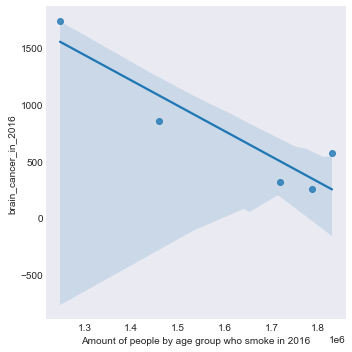

In [302]:
sns.lmplot(x="Amount of people by age group who smoke in 2016", y="brain_cancer_in_2016",data=correlation_dataset_2016);

#

In [303]:
dataframe2017 = count_of_men_and_women_diagnosed_of_brain_cancer_in_2017_england
correlationdataframe2017 = {"25-34": [i[0] for i in list(dataframe2017[['25_to_29']].values + dataframe2017[['30_to_34']].values)],
                            "35-44": [i[0] for i in list(dataframe2017[['35_to_39']].values + dataframe2017[['40_to_44']].values)],
                            "45-54": [i[0] for i in list(dataframe2017[['45_to_49']].values + dataframe2017[['50_to_54']].values)],
                            "55-64": [i[0] for i in list(dataframe2017[['55_to_59']].values + dataframe2017[['60_to_64']].values)],
                            "65+": [i[0] for i in list(dataframe2017[['65_to_69']].values + dataframe2017[['70_to_74']].values + dataframe2017[['80_to_84']].values + dataframe2017[['85_to_89']].values + dataframe2017[['90_and_over']].values)]}

brain_cancer_in_by_age_in_2017 = pd.DataFrame(correlationdataframe2017).T.sum(axis = 1, skipna = True)
brain_cancer_in_by_age_in_2017 = pd.DataFrame(brain_cancer_in_by_age_in_2017).rename(columns={0 : "brain_cancer_in_2017"})
brain_cancer_in_by_age_in_2017

,brain_cancer_in_2017
25-34,262
35-44,327
45-54,546
55-64,824
65+,1773


In [304]:
smoking_in_england_2017 = smoking_in_each_country_of_the_uk[columnsOfSmokingInEachCountryFor2017]
smoking_in_england_2017 = smoking_in_england_2017[smoking_in_england_2017.Country == "England"][smoking_in_england_2017.Sex == "Persons"][:-1]
smoking_in_england_2017 = smoking_in_england_2017.iloc[:,[2,3,13]].set_index("Age_group")[1:]

sum_of_sample = sum(smoking_in_england_2017["2017_Sample_size"])
hold_percentage_of_sample = []

for index, values in enumerate(smoking_in_england_2017["2017_Sample_size"]):
    hold_percentage_of_sample.append(values/sum_of_sample)

smoking_in_england_2017["Percentage_of_sample"] = hold_percentage_of_sample

hold_count_of_age = []
hold_count_of_smokers = []

for index, values in enumerate(smoking_in_england_2017["Percentage_of_sample"]):
    hold_count_of_age.append(values * estimated_population_in_mid_2017)
smoking_in_england_2017["Amount of people by age group in 2017"] = hold_count_of_age

for index, values in enumerate(smoking_in_england_2017["Amount of people by age group in 2017"]):
    hold_count_of_smokers.append(values * (smoking_in_england_2017["2017_Current_smokers_%"][index]/100))
smoking_in_england_2017["Amount of people by age group who smoke in 2017"] = hold_count_of_smokers

smoking_in_england_2017

,2017_Current_smokers_%,2017_Sample_size,Percentage_of_sample,Amount of people by age group in 2017,Amount of people by age group who smoke in 2017
Age_group,,,,,
25-34,19.6,22503,0.154296,8.581854e+06,1.682043e+06
35-44,16.5,25533,0.175072,9.737390e+06,1.606669e+06
45-54,16.4,28486,0.195320,1.086356e+07,1.781624e+06
55-64,14.4,27012,0.185213,1.030143e+07,1.483406e+06
65+,7.8,42309,0.290100,1.613517e+07,1.258543e+06


In [305]:
smoking_brain_cancer_joined_dataset_2017 =  smoking_in_england_2017.join(brain_cancer_in_by_age_in_2017)
smoking_brain_cancer_joined_dataset_2017

,2017_Current_smokers_%,2017_Sample_size,Percentage_of_sample,Amount of people by age group in 2017,Amount of people by age group who smoke in 2017,brain_cancer_in_2017
Age_group,,,,,,
25-34,19.6,22503,0.154296,8.581854e+06,1.682043e+06,262
35-44,16.5,25533,0.175072,9.737390e+06,1.606669e+06,327
45-54,16.4,28486,0.195320,1.086356e+07,1.781624e+06,546
55-64,14.4,27012,0.185213,1.030143e+07,1.483406e+06,824
65+,7.8,42309,0.290100,1.613517e+07,1.258543e+06,1773


In [306]:
correlation_dataset_2017 = smoking_brain_cancer_joined_dataset_2017[["Amount of people by age group who smoke in 2017", "brain_cancer_in_2017"]]
correlation_dataset_2017.corr().style.background_gradient(cmap='coolwarm')


,Amount of people by age group who smoke in 2017,brain_cancer_in_2017
Amount of people by age group who smoke in 2017,1.000000,-0.883996
brain_cancer_in_2017,-0.883996,1.000000


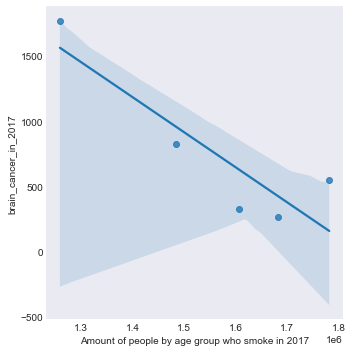

In [307]:
sns.lmplot(x="Amount of people by age group who smoke in 2017", y="brain_cancer_in_2017",data=correlation_dataset_2017);

 #

### Used for Reporting

In [308]:
smoking_in_england_2016.loc[:,"Amount of people by age group in 2016"] = smoking_in_england_2016["Amount of people by age group in 2016"].map('{:,.0f}'.format)
smoking_in_england_2016.loc[:,"Amount of people by age group who smoke in 2016"] = smoking_in_england_2016["Amount of people by age group who smoke in 2016"].map('{:,.0f}'.format)
smoking_in_england_2016.loc[:,"Percentage_of_sample"] = smoking_in_england_2016["Percentage_of_sample"].map('{:.3%}'.format)
smoking_in_england_2016.loc[:,"2016_Current_smokers_%"] = smoking_in_england_2016["2016_Current_smokers_%"].map('{:,.1f}'.format) + "%"
smoking_in_england_2016


,2016_Current_smokers_%,2016_Sample_size,Percentage_of_sample,Amount of people by age group in 2016,Amount of people by age group who smoke in 2016
Age_group,,,,,
25-34,20.6%,22627,15.698%,"8,675,768","1,787,208"
35-44,17.6%,25479,17.676%,"9,769,298","1,719,396"
45-54,16.8%,28404,19.705%,"10,890,818","1,829,657"
55-64,14.4%,26440,18.343%,"10,137,770","1,459,839"
65+,7.9%,41193,28.578%,"15,794,446","1,247,761"


In [309]:

smoking_brain_cancer_joined_dataset_2016.loc[:,"Amount of people by age group in 2016"] = smoking_brain_cancer_joined_dataset_2016["Amount of people by age group in 2016"].map('{:,.0f}'.format)
smoking_brain_cancer_joined_dataset_2016.loc[:,"Amount of people by age group who smoke in 2016"] = smoking_brain_cancer_joined_dataset_2016["Amount of people by age group who smoke in 2016"].map('{:,.0f}'.format)
smoking_brain_cancer_joined_dataset_2016.loc[:,"Percentage_of_sample"] = smoking_brain_cancer_joined_dataset_2016["Percentage_of_sample"].map('{:.3%}'.format)
smoking_brain_cancer_joined_dataset_2016.loc[:,"2016_Current_smokers_%"] = smoking_brain_cancer_joined_dataset_2016["2016_Current_smokers_%"].map('{:,.1f}'.format) + "%"


smoking_brain_cancer_joined_dataset_2016

,2016_Current_smokers_%,2016_Sample_size,Percentage_of_sample,Amount of people by age group in 2016,Amount of people by age group who smoke in 2016,brain_cancer_in_2016
Age_group,,,,,,
25-34,20.6%,22627,15.698%,"8,675,768","1,787,208",254
35-44,17.6%,25479,17.676%,"9,769,298","1,719,396",316
45-54,16.8%,28404,19.705%,"10,890,818","1,829,657",569
55-64,14.4%,26440,18.343%,"10,137,770","1,459,839",851
65+,7.9%,41193,28.578%,"15,794,446","1,247,761",1738


#

In [310]:
smoking_in_england_2017.loc[:,"Amount of people by age group in 2017"] = smoking_in_england_2017["Amount of people by age group in 2017"].map('{:,.0f}'.format)
smoking_in_england_2017.loc[:,"Amount of people by age group who smoke in 2017"] = smoking_in_england_2017["Amount of people by age group who smoke in 2017"].map('{:,.0f}'.format)
smoking_in_england_2017.loc[:,"Percentage_of_sample"] = smoking_in_england_2017["Percentage_of_sample"].map('{:.3%}'.format)
smoking_in_england_2017.loc[:,"2017_Current_smokers_%"] = smoking_in_england_2017["2017_Current_smokers_%"].map('{:,.1f}'.format) + "%"
smoking_in_england_2017


,2017_Current_smokers_%,2017_Sample_size,Percentage_of_sample,Amount of people by age group in 2017,Amount of people by age group who smoke in 2017
Age_group,,,,,
25-34,19.6%,22503,15.430%,"8,581,854","1,682,043"
35-44,16.5%,25533,17.507%,"9,737,390","1,606,669"
45-54,16.4%,28486,19.532%,"10,863,560","1,781,624"
55-64,14.4%,27012,18.521%,"10,301,428","1,483,406"
65+,7.8%,42309,29.010%,"16,135,167","1,258,543"


In [311]:

smoking_brain_cancer_joined_dataset_2017.loc[:,"Amount of people by age group in 2017"] = smoking_brain_cancer_joined_dataset_2017["Amount of people by age group in 2017"].map('{:,.0f}'.format)
smoking_brain_cancer_joined_dataset_2017.loc[:,"Amount of people by age group who smoke in 2017"] = smoking_brain_cancer_joined_dataset_2017["Amount of people by age group who smoke in 2017"].map('{:,.0f}'.format)
smoking_brain_cancer_joined_dataset_2017.loc[:,"Percentage_of_sample"] = smoking_brain_cancer_joined_dataset_2017["Percentage_of_sample"].map('{:.3%}'.format)
smoking_brain_cancer_joined_dataset_2017.loc[:,"2017_Current_smokers_%"] = smoking_brain_cancer_joined_dataset_2017["2017_Current_smokers_%"].map('{:,.1f}'.format) + "%"


smoking_brain_cancer_joined_dataset_2017

,2017_Current_smokers_%,2017_Sample_size,Percentage_of_sample,Amount of people by age group in 2017,Amount of people by age group who smoke in 2017,brain_cancer_in_2017
Age_group,,,,,,
25-34,19.6%,22503,15.430%,"8,581,854","1,682,043",262
35-44,16.5%,25533,17.507%,"9,737,390","1,606,669",327
45-54,16.4%,28486,19.532%,"10,863,560","1,781,624",546
55-64,14.4%,27012,18.521%,"10,301,428","1,483,406",824
65+,7.8%,42309,29.010%,"16,135,167","1,258,543",1773
